Hyper Thyroid Prediction Model¶

Importing Libraries and Dataset

In [20]:
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns # visualization
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'
from sklearn.impute import SimpleImputer


data = pd.read_csv("C:/python and machine learning/hyperthyroid_train_final.csv",index_col=False,)

##Inspecting and Cleaning the dataset

In [22]:
data.head(2)

,patient_id,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,3733,41.0,F,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,1442,23.0,F,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative


In [23]:
# id coloumn is redundant 
data.drop('patient_id', axis=1, inplace=True, errors='ignore')
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative


In [24]:
data.shape

(2800, 28)

In [25]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [26]:
# Review number of columns of each data type in a DataFrame:
dtype_counts = data.dtypes.value_counts()

print(dtype_counts)

object     22
float64     6
Name: count, dtype: int64


In [27]:
enc=LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        2800 non-null   int64
 1   sex                        2800 non-null   int32
 2   on_thyroxine               2800 non-null   int32
 3   query_on_thyroxine         2800 non-null   int32
 4   on_antithyroid_medication  2800 non-null   int32
 5   sick                       2800 non-null   int32
 6   pregnant                   2800 non-null   int32
 7   thyroid_surgery            2800 non-null   int32
 8   I131_treatment             2800 non-null   int32
 9   query_hypothyroid          2800 non-null   int32
 10  query_hyperthyroid         2800 non-null   int32
 11  lithium                    2800 non-null   int32
 12  goitre                     2800 non-null   int32
 13  tumor                      2800 non-null   int32
 14  hypopituitary           

In [28]:
#check for missing variables
data.isnull()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
print(data.isnull().sum())

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
referral_source              0
class                        0
dtype: int64


In [30]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].astype(str)

# Separate columns into numeric and categorical
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute numeric columns if any exist
if not numeric_cols.empty:
    print("Imputing numeric columns:", list(numeric_cols))
    numeric_imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])
else:
    print("No numeric columns to impute.")

# Impute categorical columns if any exist
if not categorical_cols.empty:
    print("Imputing categorical columns:", list(categorical_cols))
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])
else:
    print("No categorical columns to impute.")

# Display the DataFrame after imputation
print("\nDataFrame after Imputation:")
print(data)

Imputing numeric columns: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
No categorical columns to impute.

DataFrame after Imputation:
       age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0     38.0    0             0                   0                          0   
1     20.0    0             0                   0                          0   
2     43.0    1             0                   0                          0   
3     67.0    0             1                   0                          0   
4     67.0    0             0                   0                          0   
...    ...  ...           ...                 ...                        ...   
2795  67.0    1             0                   0                          0   
2796  70.0    1             0                   1                          0   
2797  72.0    1             0                   0                          0   
2798  57.0    0             0                   0                    

In [31]:
data_replaced = data.replace({'f': 0, 't': 1})

print("\nDataFrame after replacement:")
print(data_replaced)


DataFrame after replacement:
       age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0     38.0    0             0                   0                          0   
1     20.0    0             0                   0                          0   
2     43.0    1             0                   0                          0   
3     67.0    0             1                   0                          0   
4     67.0    0             0                   0                          0   
...    ...  ...           ...                 ...                        ...   
2795  67.0    1             0                   0                          0   
2796  70.0    1             0                   1                          0   
2797  72.0    1             0                   0                          0   
2798  57.0    0             0                   0                          0   
2799  78.0    0             0                   0                          0   

      sic

In [32]:
##Exploratory Data Analytics¶

In [33]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,48.742143,0.385714,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,0.791071,29.356429,0.934286,100.032143,0.893929,62.248571,0.894643,102.061429,3.277857,2.964286
std,18.993858,0.561803,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,0.406616,19.165572,0.247826,44.406463,0.307984,31.796923,0.307068,46.295899,1.096590,0.237911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,17.000000,1.000000,72.000000,1.000000,42.000000,1.000000,74.000000,3.000000,3.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,22.000000,1.000000,90.000000,1.000000,54.000000,1.000000,89.000000,4.000000,3.000000
75%,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,34.000000,1.000000,115.250000,1.000000,68.000000,1.000000,113.000000,4.000000,3.000000
max,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,64.000000,1.000000,217.000000,1.000000,138.000000,1.000000,209.000000,4.000000,3.000000


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is a DataFrame where the last column is the target variable
list1 = data.columns[:-1]  # List of feature column names
print("Feature columns:", list1)

# Separate features (X) and target variable (y)
X = data[list1]  # Features
y = data.iloc[:, -1]  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, for easier manipulation later)
X_scaled_df = pd.DataFrame(X_scaled, columns=list1)


Feature columns: Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source'],
      dtype='object')


In [35]:
data_replaced = data.replace({'negative': 0, 'hyperthyroid': 1})

print("\nDataFrame after replacement:")
print(data_replaced)


DataFrame after replacement:
       age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0     38.0    0             0                   0                          0   
1     20.0    0             0                   0                          0   
2     43.0    1             0                   0                          0   
3     67.0    0             1                   0                          0   
4     67.0    0             0                   0                          0   
...    ...  ...           ...                 ...                        ...   
2795  67.0    1             0                   0                          0   
2796  70.0    1             0                   1                          0   
2797  72.0    1             0                   0                          0   
2798  57.0    0             0                   0                          0   
2799  78.0    0             0                   0                          0   

      sic

Data Visualization¶

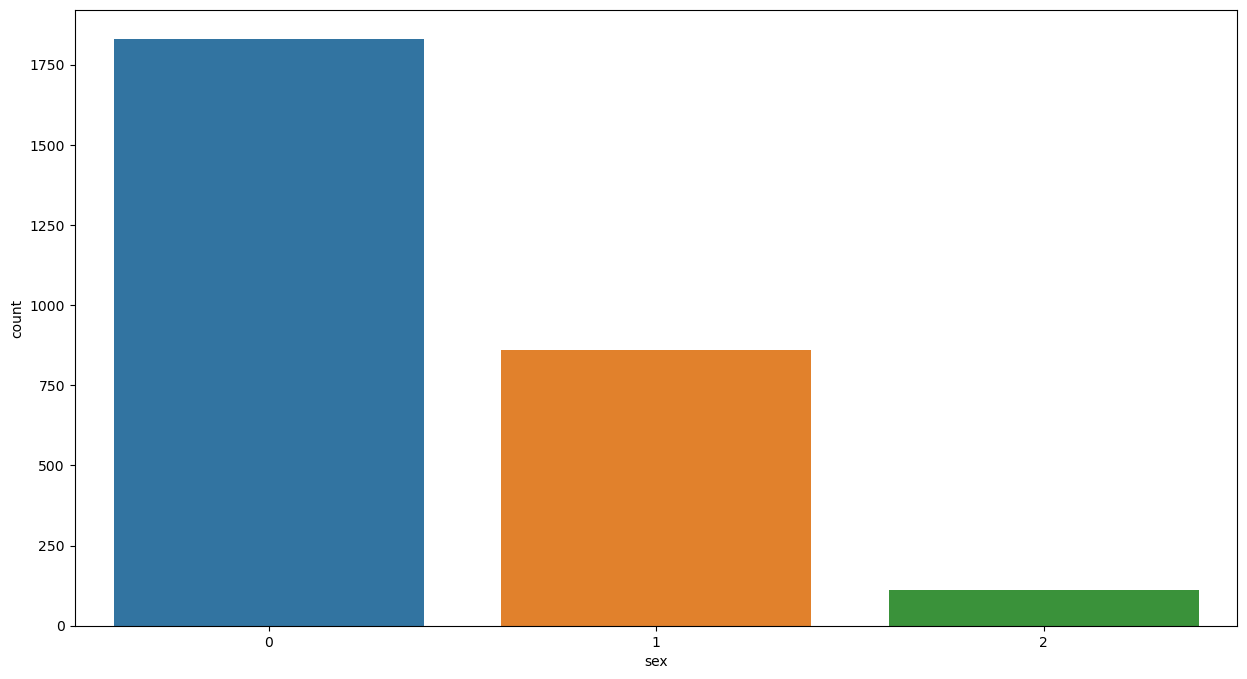

In [37]:
sns.countplot (x='sex',data=data)
plt.show()

# Here the missing values of gender are 2 
# The blue region represents the females suffering from goitre 
# the orange region represents males 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


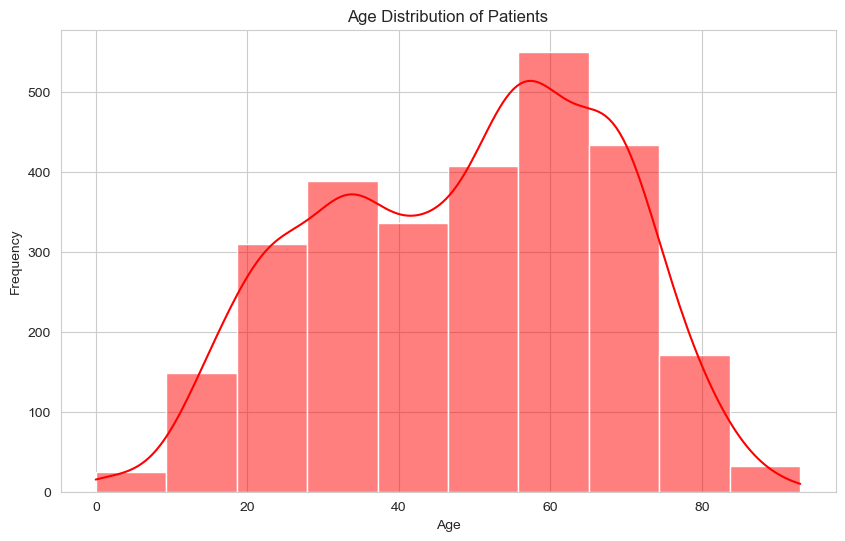

In [38]:
# visualizing target variable with respect to age 

# set background style of the plot 
sns.set_style('whitegrid')

#plotting histogram for age 
plt.figure(figsize=(10,6))
sns.histplot(data['age'] , kde=True , color='red' , bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Visualizing via histograms

In [40]:
data_id_diag = data.loc[:, [ "class"]]
data_diag = data.loc[:, ["class"]]
data_mean = data.iloc[:, 1:11]
data_se = data.iloc[:, 11:22]
data_worst = data.iloc[:, 23:]

print("data_diag:\n", data_diag.head())
print("data_mean:\n", data_mean.head())
print("data_se:\n", data_se.head())
print("data_worst:\n", data_worst.head())

data_diag:
    class
0      3
1      3
2      3
3      3
4      3
data_mean:
    sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  sick  \
0    0             0                   0                          0     0   
1    0             0                   0                          0     0   
2    1             0                   0                          0     0   
3    0             1                   0                          0     0   
4    0             0                   0                          0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0         0                0               0                  0   
1         0                0               0                  0   
2         0                0               0                  0   
3         0                0               0                  0   
4         0                0               0                  0   

   query_hyperthyroid  
0                   0  
1       

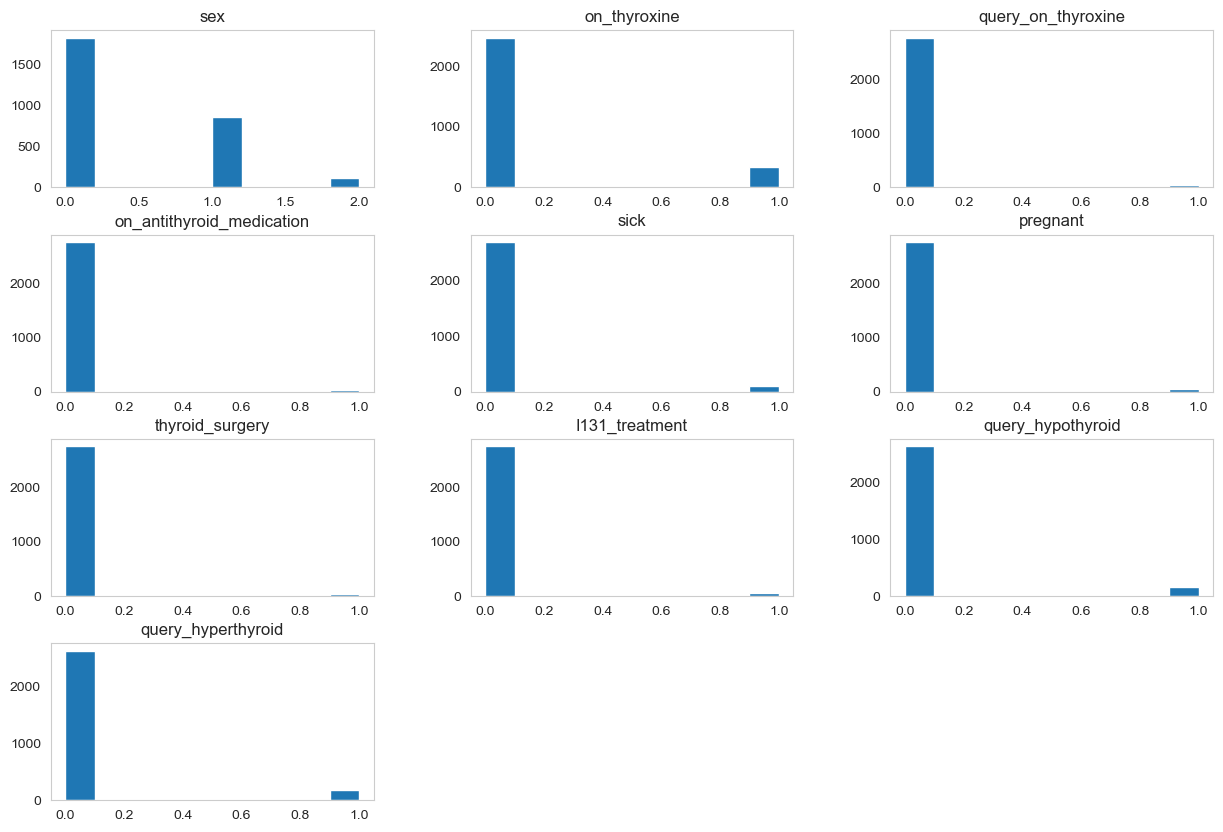

In [41]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

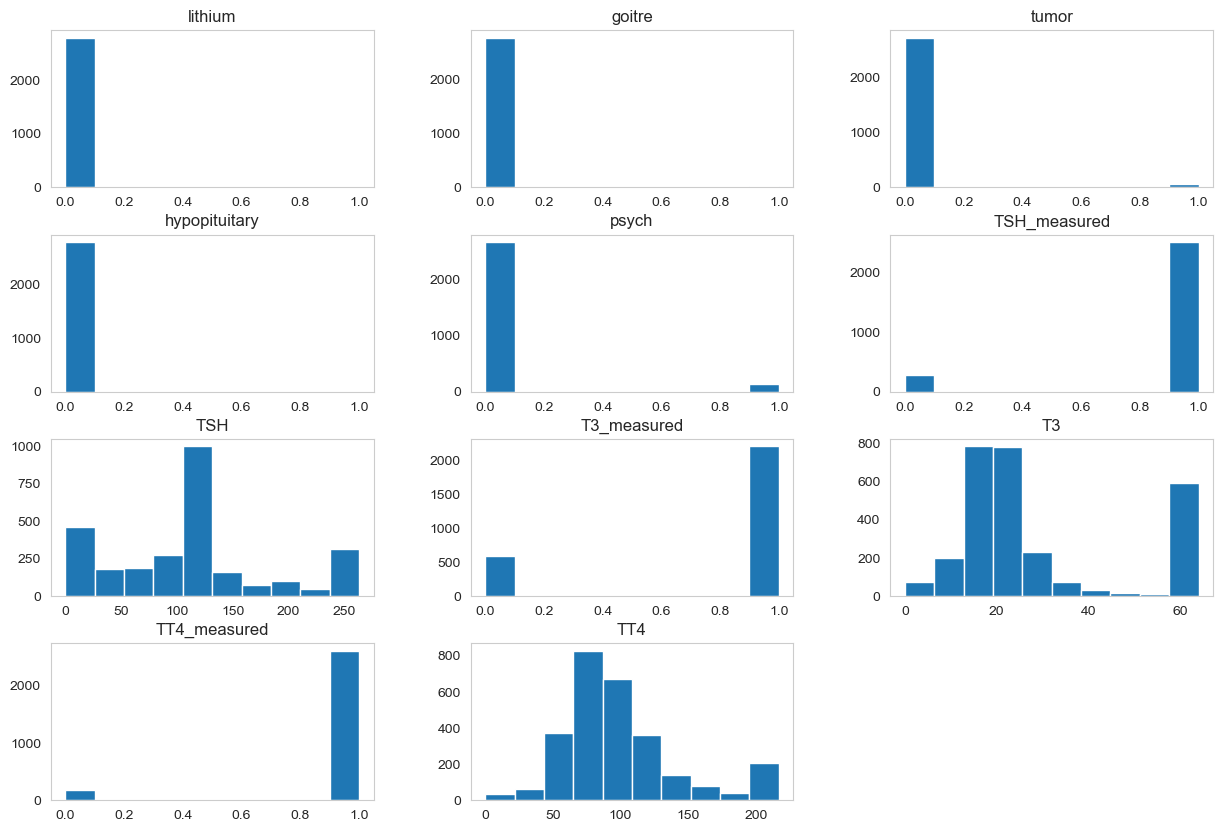

In [42]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

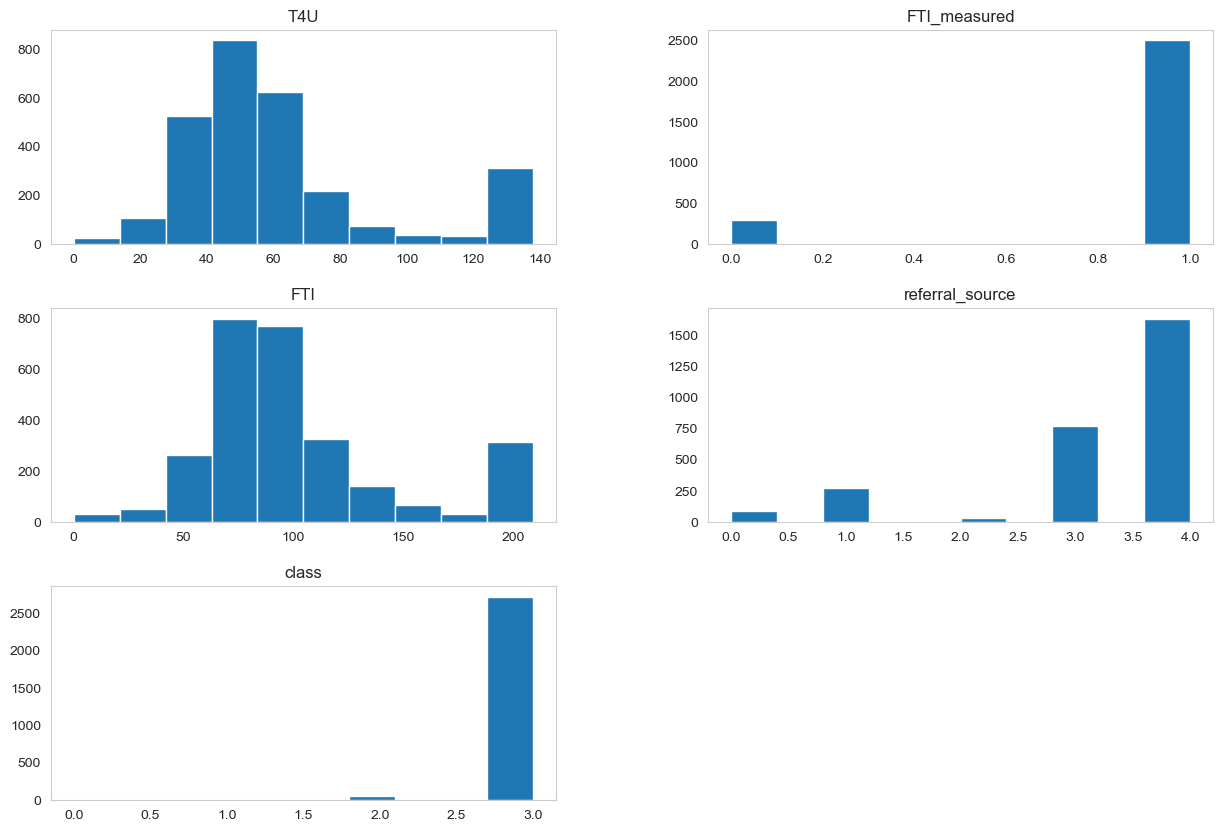

In [43]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

Visualizing via Box Plots¶

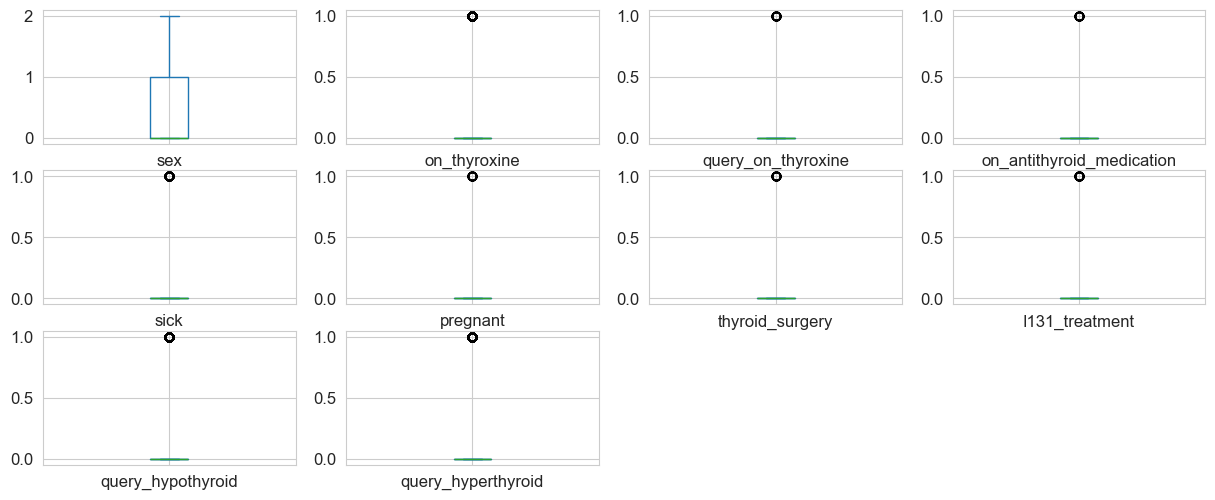

In [45]:
#_mean suffix 
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

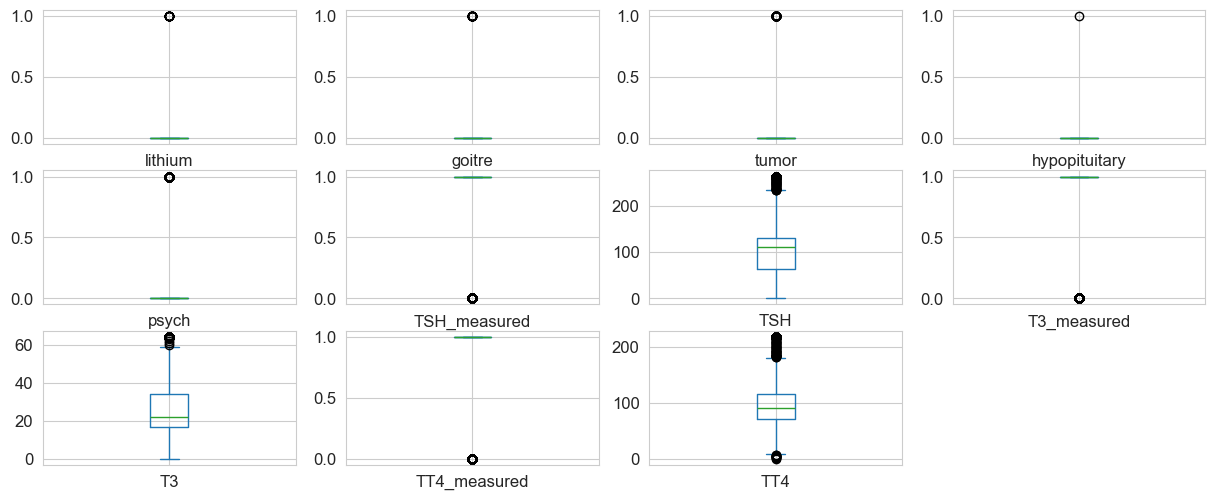

In [46]:
#se_suffix
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

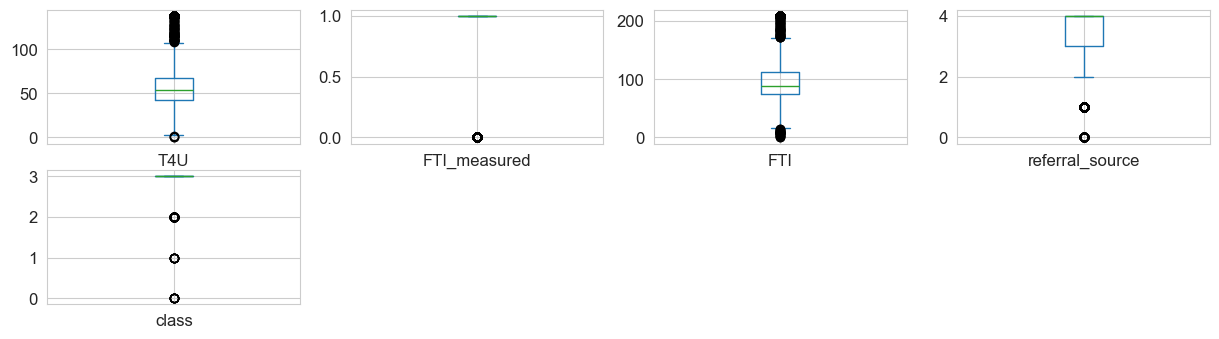

In [47]:
#worst_plot
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

C:\Users\hp\AppData\Local\Temp\ipykernel_8060\1602773000.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data[column]))
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_8060\1602773000.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

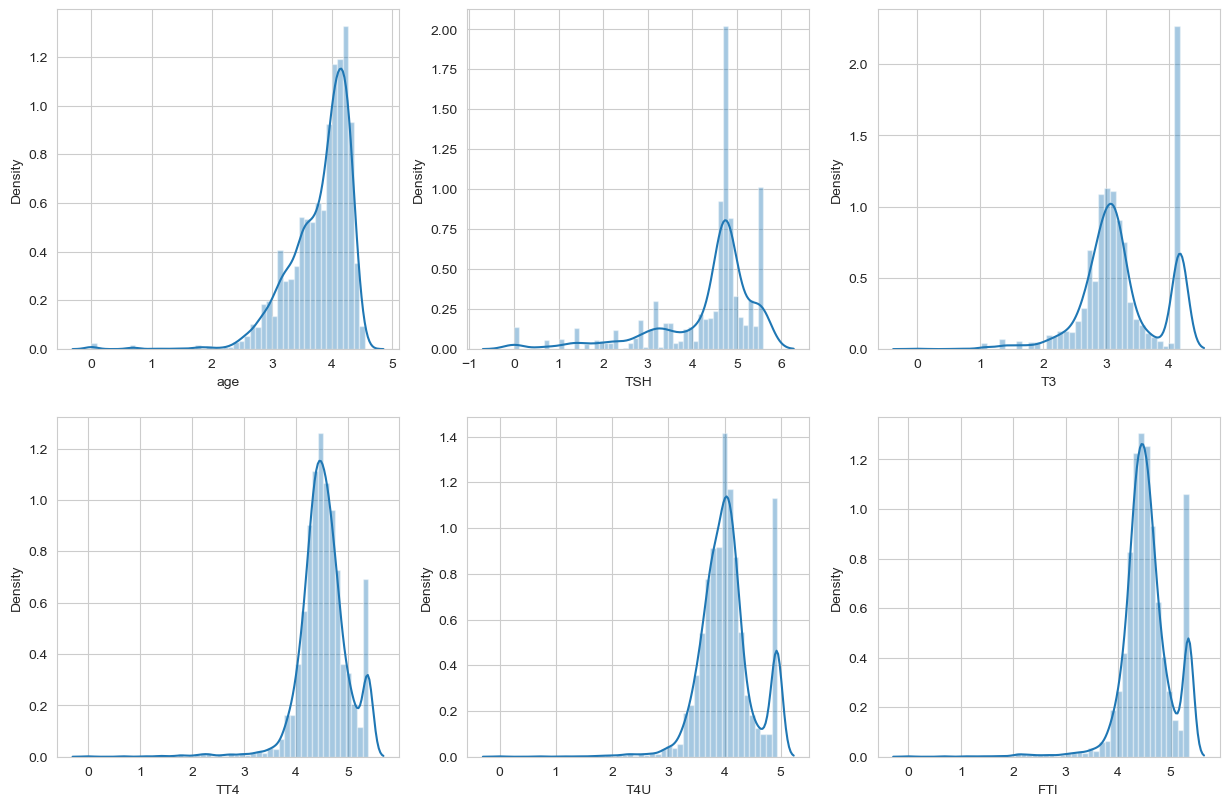

In [48]:
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age','TSH','T3','TT4','T4U','FTI']


plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


## Correlation Analysis using Heatmap 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

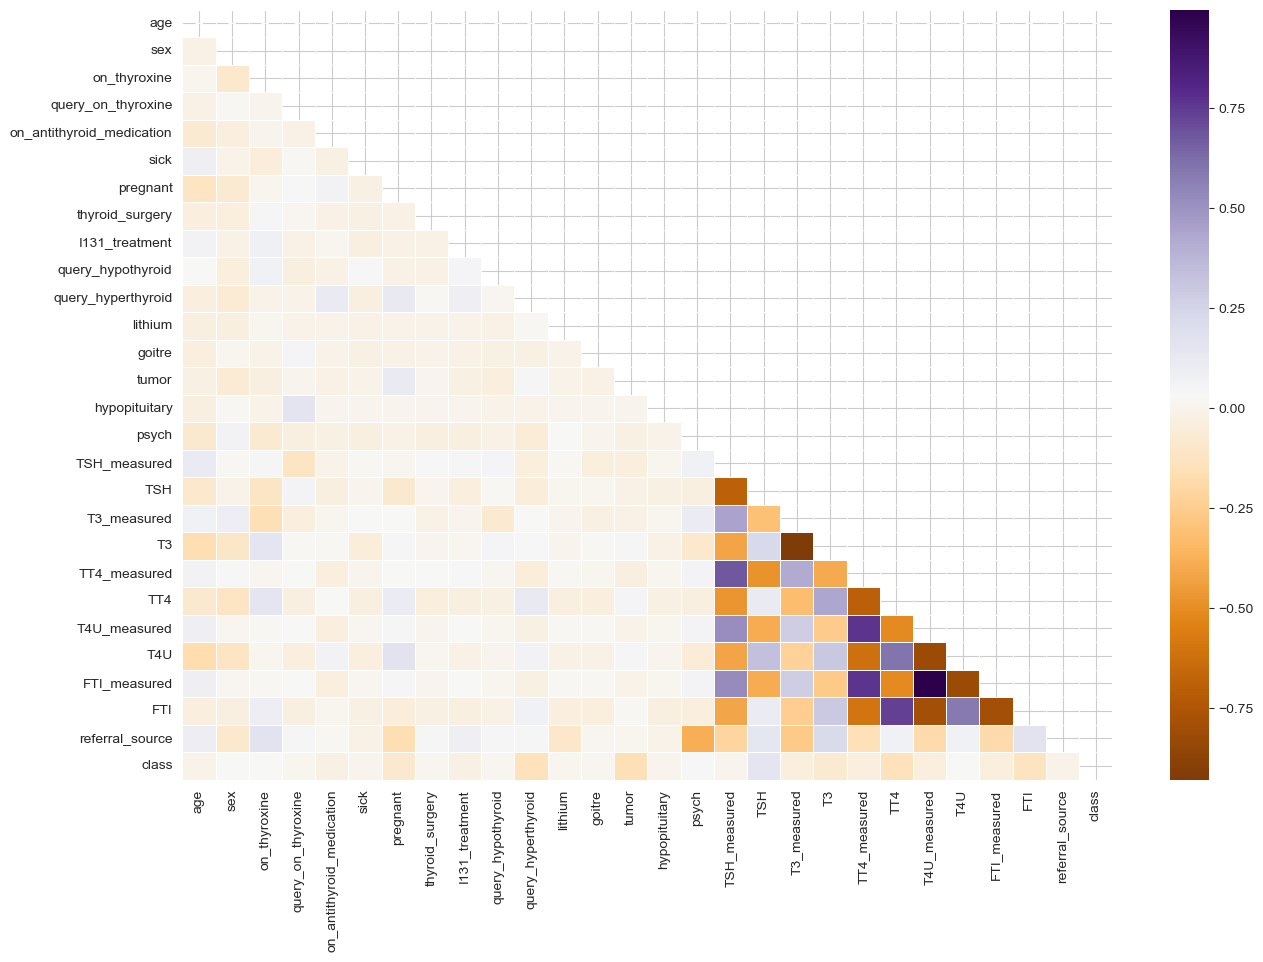

In [50]:
# correlation analysis using heatmap
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'Thyroid Feature Correlation'}>

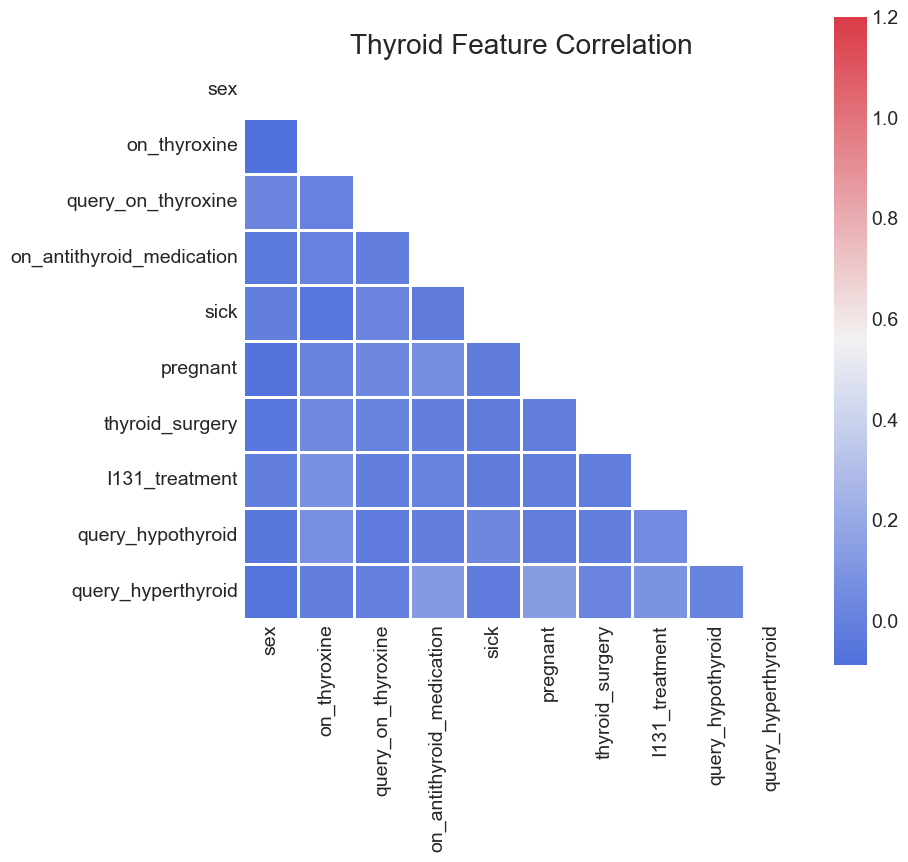

In [51]:
# Correlation Analysis Using Heatmap 
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Thyroid Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1.2, square=True, cmap=cmap, annot=True, fmt='.2g', linewidths=2, ax=ax)

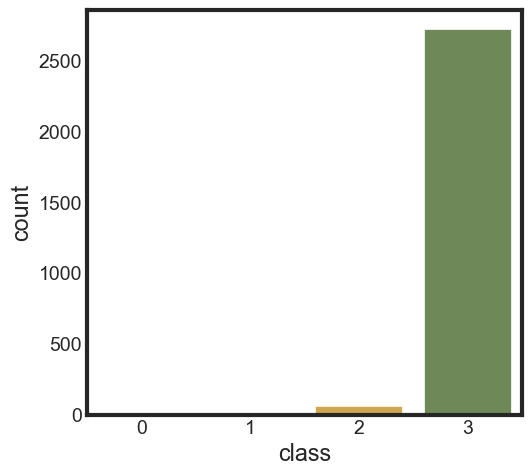

In [52]:
plt.figure(figsize=(5, 5))
sns.countplot (x='class',data=data)
plt.show()

We can see the dataset is highly imbalanced

In [54]:
x = data.drop(['class'],axis=1)
y = data['class']

In [55]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsample=RandomOverSampler()

rdsample = RandomOverSampler()
x_sampled,y_sampled  = rdsample.fit_resample(x,y)

In [56]:
#Checking for shape of x_sample
x_sampled.shape

(10892, 27)

In [57]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source
0,39.0,0,0,0,0,0,0,0,0,0,...,108.0,1,26.0,1,109.0,1,69.0,1,89.0,1
1,21.0,0,0,0,0,0,0,0,0,0,...,136.0,1,21.0,1,86.0,0,139.0,0,210.0,4
2,44.0,1,0,0,0,0,0,0,0,0,...,102.0,0,65.0,1,93.0,1,45.0,1,100.0,4
3,68.0,0,1,0,0,0,0,0,0,0,...,22.0,1,20.0,1,159.0,0,139.0,0,210.0,4
4,68.0,0,0,0,0,0,0,0,0,0,...,76.0,1,13.0,1,45.0,1,41.0,1,50.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10887,70.0,0,0,0,0,0,0,0,0,0,...,17.0,1,26.0,1,164.0,1,37.0,1,187.0,3
10888,47.0,0,0,0,0,0,0,0,0,0,...,7.0,1,22.0,1,167.0,1,57.0,1,159.0,4
10889,77.0,1,0,0,0,0,0,0,0,0,...,6.0,1,42.0,1,144.0,1,32.0,1,177.0,4
10890,59.0,0,0,0,0,1,0,0,0,0,...,25.0,1,39.0,1,209.0,1,68.0,1,192.0,4


<Axes: xlabel='class', ylabel='count'>

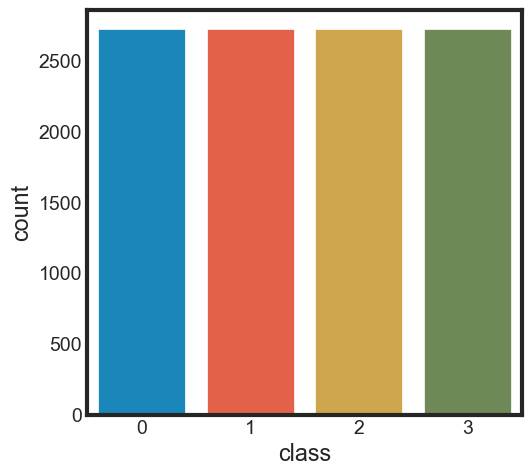

In [58]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x= y_sampled)  

This is the balanced dataset , doing this helps to make more accurate predictions by making sure the model dosen't get biased towards one class

Data Preprocessing

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit(data)

# Summarize components
print(f"Explained Variance: {fit.explained_variance_ratio_}")
print(f"Components:\n{fit.components_}")

Explained Variance: [5.18686087e-01 3.33234243e-01 5.12868521e-02 4.37791073e-02
 3.05212645e-02 2.23224406e-02 9.64965231e-05 2.67979776e-05
 8.76826967e-06 5.76253403e-06 4.88508222e-06 4.50153541e-06
 3.63232766e-06 3.32724466e-06 3.20914048e-06 2.21870887e-06
 2.08812539e-06 1.44977454e-06 1.23663614e-06 1.17106699e-06
 1.07571747e-06 1.05778065e-06 9.39338052e-07 7.68688867e-07
 4.33879795e-07 1.23778930e-07 3.13212025e-08 3.05994333e-08]
Components:
[[-3.07646044e-02 -3.38051489e-04 -2.47400558e-04  5.82613681e-05
  -2.37665720e-05 -4.02395960e-05 -7.57337029e-05 -1.48604297e-05
  -7.12934445e-05  4.28803536e-05 -1.92374325e-05 -6.86426311e-06
  -8.68511358e-06  1.03655102e-06 -6.68434287e-06 -1.22011580e-04
  -3.09321904e-03  8.98689732e-01 -2.11045294e-03  8.90620178e-02
  -2.21505855e-03  2.53228591e-01 -2.49529213e-03  2.37310537e-01
  -2.49755295e-03  2.50996828e-01  2.48279402e-03  2.78817875e-04]
 [-1.35929651e-02 -7.30748316e-04  9.25584896e-04 -1.17252260e-04
   7.386418

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



# Convert to DataFrame
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
data['class'] = y

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

# Plotting
plt.figure(figsize=(10, 8))
for cls in np.unique(pca_df['class']):
    subset = pca_df[pca_df['class'] == cls]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {cls}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Dataset')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [63]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Create Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [65]:
#Splitting data into train and test for model building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
def log_classifier(X_train,X_test,y_train,y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,y_train)
    log_pred=log_model.predict(X_test)
    cm=confusion_matrix(y_test,log_pred)
    acc = accuracy_score(log_pred,y_test)
    return(f'Accuracy_Score: {acc}\n Train Score: {log_model.score(X_train,y_train)}\n Test Score: {log_model.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [ ]:
def log_classifier(X_train,X_test,y_train,y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,y_train)
    log_pred=log_model.predict(X_test)
    cm=confusion_matrix(y_test,log_pred)
    acc = accuracy_score(log_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {log_model.score(X_train,y_train)}\n Test Score: {log_model.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [ ]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    knn_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,knn_pred)
    acc = accuracy_score(knn_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_knn.score(X_train,y_train)}\n Test Score: {classifier_knn.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [ ]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    dt_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,dt_pred)
    acc = accuracy_score(dt_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_tree.score(X_train,y_train)}\n Test Score: {classifier_tree.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [ ]:
def forest_classifier(X_train,X_test,y_train,y_test):
    
    # create an instance of a Random Forest classifier
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    # training the Random Forest model on the sampled train dataset
    classifier_forest.fit(X_train,y_train)
    # pedicting the labels on the test set
    rf_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,rf_pred)
    acc = accuracy_score(rf_pred,y_test)
    #cl_report = classification_report(y_test,rf_pred)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_forest.score(X_train,y_train)}\n Test Score: {classifier_forest.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [ ]:
def naive_bayes_classifier(X_train, X_test, y_train, y_test):
    
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train, y_train)
    nb_pred = classifier_nb.predict(X_test)
    cm = confusion_matrix(y_test, nb_pred)
    acc = accuracy_score(y_test, nb_pred)
    cl_report = classification_report(y_test, nb_pred)
    
    # Format and return the results
    return (f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_nb.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_nb.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

In [ ]:
def svc_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svc = SVC(kernel='linear', random_state=0)  # You can change kernel type as needed
    classifier_svc.fit(X_train, y_train)
    svc_pred = classifier_svc.predict(X_test)
    cm = confusion_matrix(y_test, svc_pred)
    acc = accuracy_score(y_test, svc_pred)
    cl_report = classification_report(y_test, svc_pred)
    
    
    return (f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_svc.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_svc.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

In [ ]:
def lda_classifier(X_train, X_test, y_train, y_test):
    
    classifier_lda = LinearDiscriminantAnalysis()
    classifier_lda.fit(X_train, y_train)
    lda_pred = classifier_lda.predict(X_test)
    cm = confusion_matrix(y_test, lda_pred)
    acc = accuracy_score(y_test, lda_pred)
    cl_report = classification_report(y_test, lda_pred)
    

    return (f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_lda.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_lda.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def neural_network_classifier(X_train, X_test, y_train, y_test):
    # Create an instance of a Multi-layer Perceptron (MLP) classifier
    classifier_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
    
    # Train the MLP model on the training dataset
    classifier_nn.fit(X_train, y_train)
    
    # Predict the labels on the test set
    nn_pred = classifier_nn.predict(X_test)
    
    # Calculate confusion matrix and accuracy
    cm = confusion_matrix(y_test, nn_pred)
    acc = accuracy_score(y_test, nn_pred)
    
    # Optionally, you can also get a detailed classification report
    cl_report = classification_report(y_test, nn_pred)
    
    # Format and return the results
    return (f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_nn.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_nn.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

In [67]:
def print_score(X_train, X_test, y_train, y_test):
    print("Logistic Regression:\n")
    result0 = log_classifier(X_train, X_test, y_train, y_test)
    print(result0)
    print("-" * 100)
    print()
    
    print("SVM:\n")
    result1 = svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-" * 100)
    print()

    print("KNN:\n")
    result2 = knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)
    print("-" * 100)
    print()

    print("Decision Tree:\n")
    result3 = tree_classifier(X_train, X_test, y_train, y_test)
    print(result3)
    print("-" * 100)
    print()

    print("Random Forest:\n")
    result4 = forest_classifier(X_train, X_test, y_train, y_test)
    print(result4)
    print("-" * 100)
    print()

    print("Naive Bayes:\n")
    result5 = naive_bayes_classifier(X_train, X_test, y_train, y_test)
    print(result5)
    print("-" * 100)
    print()

    print("Linear Discriminant Analysis (LDA):\n")
    result6 = lda_classifier(X_train, X_test, y_train, y_test)
    print(result6)
    print("-" * 100)
    print()

    print("Neural Network (MLP):\n")
    result7 = neural_network_classifier(X_train, X_test, y_train, y_test)
    print(result7)
    print("-" * 100)
    print()